In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

%matplotlib inline

In [3]:
titanic_data = pd.read_csv('titanic/train.csv')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


    первым делом надо сделать базовую предобработку данных, что бы понять с чем работать
    head дал понять с каким типом у нас данных.
    еще можно посомтреть пропускии
        видно что пропуски в колонках есть(Age, Cabin, Embarked)
       
    в рамках этого курса отбросим PassengerId, Name, Cabin, Survived, Ticket
    

In [5]:
titanic_data.isnull().sum() # checking for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = titanic_data.drop(['PassengerId', 'Name', 'Cabin', 'Survived', 'Ticket'],axis=1) # удаление не нужных столбцов
y = titanic_data['Survived']

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
# тепреь нужно привести к нужному виду. get_dummies сам перевел в числовые значения
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [9]:
X['Age'].fillna(X['Age'].median(), inplace=True)
# X['Age'].median()
# X['Age'].isnull().sum()

In [10]:
# тепреь нужно дерево
clf = tree.DecisionTreeClassifier(criterion='entropy') # создание дерева


In [12]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

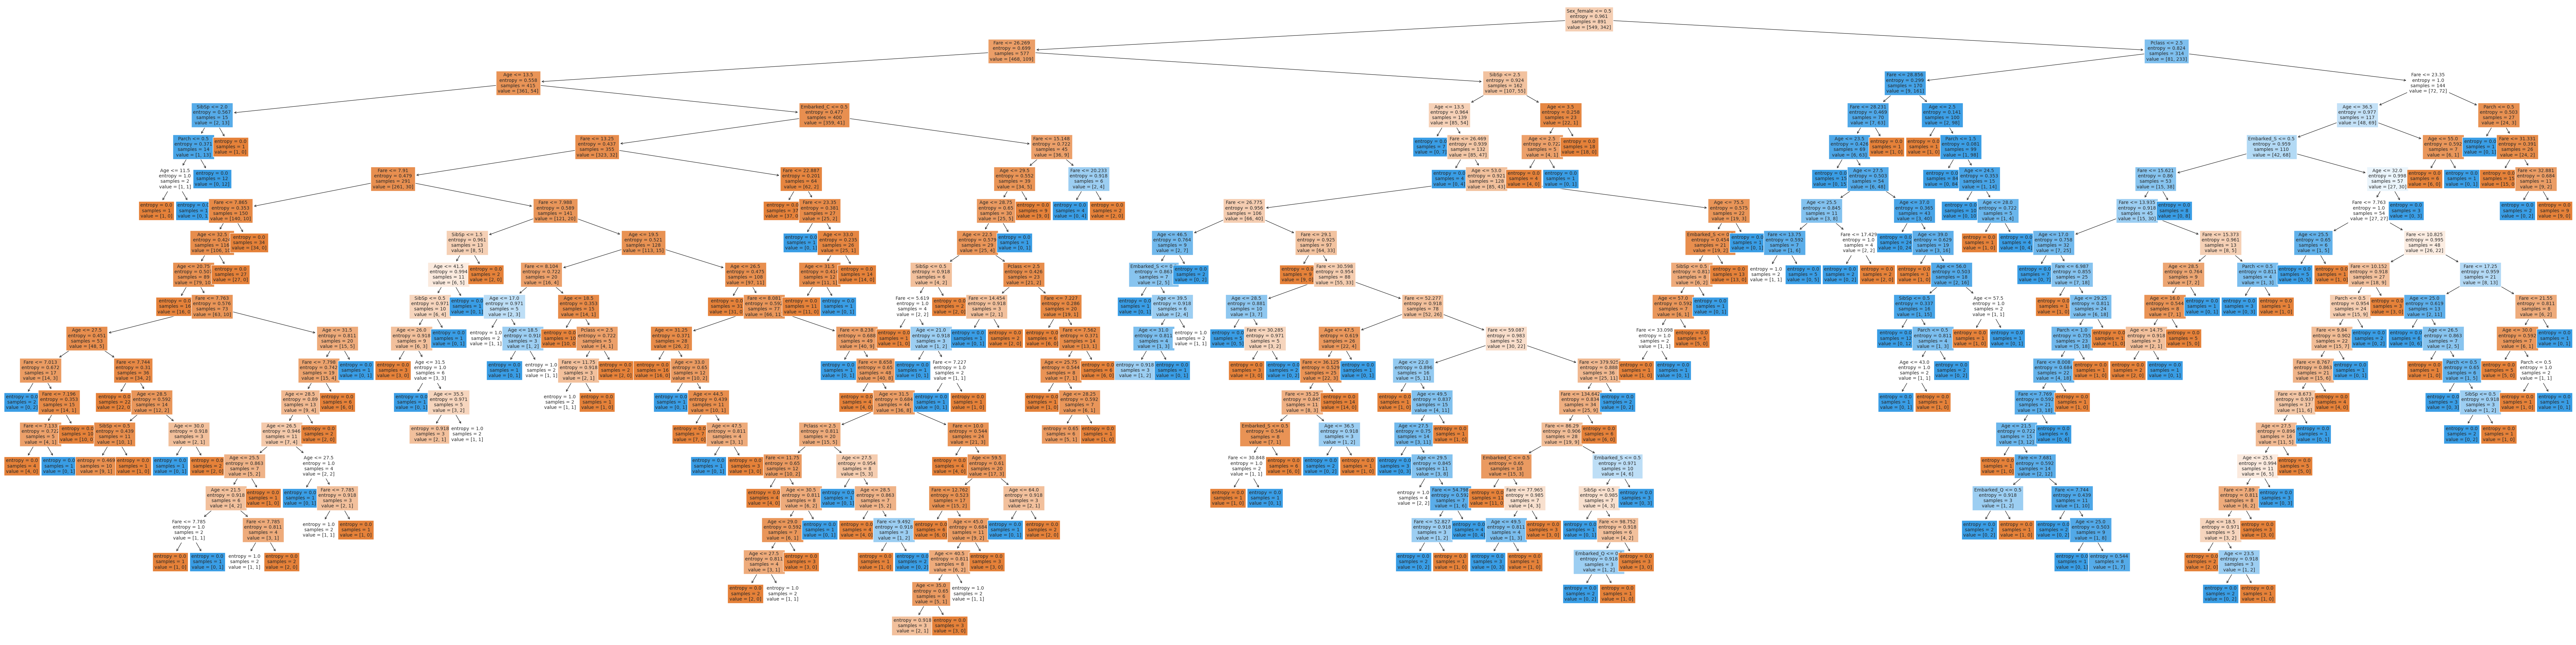

In [15]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.savefig('tree.png')

    модель переобучена. и слишком непонятно выглядит. Дерево решений не вычлениноло какойто паттерн который может помочь понять выживет или нет. Оно просто перебирало все варианты. Дерево пытается безошибочно классифицировать всё. 
    что бы изюежать переобучения. сделаю данные для тренировки и для тестов

In [17]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((596, 10), (295, 10), (596,), (295,))

In [23]:

clf.score(X, y)

0.9797979797979798

In [26]:
clf.fit(X_train, y_train) #обучил не на всех дданных

DecisionTreeClassifier(criterion='entropy')

In [27]:
clf.score(X_train, y_train) 

0.9798657718120806

In [29]:
clf.score(X_test, y_test) # score на тех данных которые классификатор не видел

0.7694915254237288

In [34]:
# что бы дерево не переобучилосьь. можно изменить глубину дерева
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [36]:
clf.score(X_train, y_train)

0.8238255033557047

In [37]:
clf.score(X_test, y_test)

0.8203389830508474

# переобучение

In [40]:
max_depth_values = range(1, 100)

In [41]:
scores_data = pd.DataFrame()

In [43]:

for max_depth in max_depth_values:
    # смотреть как разная глубина будет влиять
    clf = tree.DecisionTreeClassifier( criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({"max_depth":[max_depth], "train_score":[train_score], "test_score":[test_score]})
    scores_data = scores_data.append(temp_score_data, ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'